In [27]:
import numpy as np
from scipy.special import digamma,spence,polygamma
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter

In [28]:
rcParams['figure.figsize'] = (5.333,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['pdf.fonttype'] = 42
#rcParams['text.usetex'] = True
#prop = font_manager.FontProperties(fname='C:/Windows/Fonts/HelveticaNeueLTCom-Roman.ttf')
#rcParams['text.latex.preamble']=r'\usepackage{amsmath}\n\usepackage{amsfonts}'

In [29]:
fig_direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/figures/'

In [30]:
#ptrue = np.linspace(0.01,0.99,100)
#K = np.random.geometric(p=np.tile(ptrue,[1000,1]))
x = np.loadtxt('D:/Bas/Documents/nll_true_psycho_alldata.txt')
ptrue = np.exp(-x)

In [31]:
K = np.random.geometric(np.tile(ptrue,[25,1,1]))

In [7]:
def get_ibs_variance_p(ptrue):
    return spence(ptrue)

def get_ibs_variance_K(K):
    Kmax = np.max(K)
    V = polygamma(1,1) - polygamma(1,np.arange(0,Kmax+1))
    return V[K]

def get_ibs_estimate_K(K):
    Kmax = np.max(K)
    L = digamma(1) - digamma(np.arange(0,Kmax+1))
    return L[K]


In [8]:
Libs = get_ibs_estimate_K(K)
Vibs_K = get_ibs_variance_K(K)
Vibs_true = get_ibs_variance_p(ptrue)

plt.plot(np.mean(np.log(ptrue),axis=1),np.mean(Libs,axis=(0,2)),'.',alpha=0.2)
plt.show()

plt.plot(np.mean(1/ptrue,axis=1),np.mean(K,axis=(0,2)),'.',alpha=0.2)
plt.show()

In [9]:
Z_Vibs_true = (np.sum(Libs,axis=2) - np.sum(np.log(ptrue),axis=1))/np.sqrt(np.sum(Vibs_true,axis=1))

In [10]:
Z_Vibs_K = (np.sum(Libs,axis=2) - np.sum(np.log(ptrue),axis=1)[None,:])/np.sqrt(np.sum(Vibs_K,axis=2))

In [11]:
Z_K = (np.sum(K,axis=2) - np.sum(1/ptrue,axis=1)[None,:])/np.sqrt(np.sum((1-ptrue)/ptrue**2,axis=1))[None,:]

In [42]:
def plot_zscore_hist(Z,filename,fig_label,show_legend=False):
    fig,ax = plt.subplots()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    z = np.arange(-4,4,0.01)
    ax.plot(z,sts.norm.pdf(z),color='black',label = 'Standard normal pdf',alpha=0.8)
    ax.hist(Z[0,:].flatten(),100,density='normed',label='Empirical distribution')
    if show_legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Density')
    #fig.text(0.05,0.9,fig_label)
    ax.set_ylim([0,0.55])
    ax.set_xlim([-4,4])
    ax.set_yticks([0,0.2,0.4])
    fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25)
    fig.savefig(fig_direc + filename)
    plt.show()
    

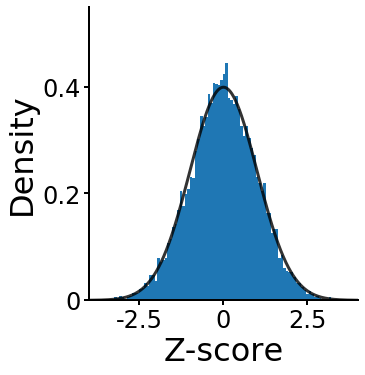

In [43]:
plot_zscore_hist(Z_Vibs_true,'calibration_true_ibs.pdf','B')

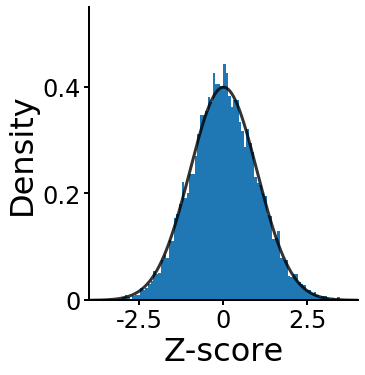

In [44]:
plot_zscore_hist(Z_Vibs_K,'calibration_estimated_ibs.pdf','C')

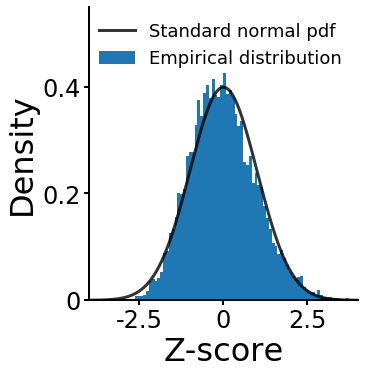

In [45]:
plot_zscore_hist(Z_K,'calibration_runtime.pdf','A',show_legend=True)